In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/spring-epfl/synthetic_data_release/master/data/texas.csv")

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_2885/3554155461.py:1: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/spring-epfl/synthetic_data_release/master/data/texas.csv")


In [4]:
df.head()

,DISCHARGE,TYPE_OF_ADMISSION,PAT_STATE,PAT_STATUS,SEX_CODE,RACE,ETHNICITY,ADMIT_WEEKDAY,PAT_AGE,RISK_MORTALITY,ILLNESS_SEVERITY,LENGTH_OF_STAY,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL
0,2013Q4,3,TX,6,F,4,2,3,16,1,1,4,55076.06,0.0,5328.0,0.0,49748.06,0.0
1,2013Q1,4,TX,1,F,4,2,4,1,1,1,2,2119.00,0.0,1790.0,0.0,329.00,0.0
2,2013Q1,1,TX,1,F,4,2,1,11,1,1,1,9534.00,0.0,969.0,0.0,8565.00,0.0
3,2013Q3,2,TX,3,M,4,2,1,18,2,1,3,70710.30,0.0,2172.0,0.0,68538.30,0.0
4,2013Q4,2,TX,1,M,4,2,3,16,3,3,3,66653.04,0.0,10185.0,0.0,56468.04,0.0


In [5]:
df.shape

(100000, 18)

In [6]:
df["RISK_MORTALITY"].value_counts()

1    61388
2    19923
3    13771
4     4775
0      143
Name: RISK_MORTALITY, dtype: int64

In [7]:
# REDUCE THE RISK MORTALITY
# MINOR (1) OR MAJOR (3)
df = df[(df["RISK_MORTALITY"] == 1) | (df["RISK_MORTALITY"] == 3)]
print(df.shape)

(75159, 18)


In [8]:
df.columns

Index(['DISCHARGE', 'TYPE_OF_ADMISSION', 'PAT_STATE', 'PAT_STATUS', 'SEX_CODE',
       'RACE', 'ETHNICITY', 'ADMIT_WEEKDAY', 'PAT_AGE', 'RISK_MORTALITY',
       'ILLNESS_SEVERITY', 'LENGTH_OF_STAY', 'TOTAL_CHARGES',
       'TOTAL_NON_COV_CHARGES', 'TOTAL_CHARGES_ACCOMM',
       'TOTAL_NON_COV_CHARGES_ACCOMM', 'TOTAL_CHARGES_ANCIL',
       'TOTAL_NON_COV_CHARGES_ANCIL'],
      dtype='object')

In [9]:
df.dtypes

DISCHARGE                        object
TYPE_OF_ADMISSION                object
PAT_STATE                        object
PAT_STATUS                       object
SEX_CODE                         object
RACE                             object
ETHNICITY                        object
ADMIT_WEEKDAY                     int64
PAT_AGE                           int64
RISK_MORTALITY                    int64
ILLNESS_SEVERITY                  int64
LENGTH_OF_STAY                    int64
TOTAL_CHARGES                   float64
TOTAL_NON_COV_CHARGES           float64
TOTAL_CHARGES_ACCOMM            float64
TOTAL_NON_COV_CHARGES_ACCOMM    float64
TOTAL_CHARGES_ANCIL             float64
TOTAL_NON_COV_CHARGES_ANCIL     float64
dtype: object

In [10]:
cat_cols = ["DISCHARGE", "TYPE_OF_ADMISSION", 
            "PAT_STATE", "PAT_STATUS", 
            "SEX_CODE", "RACE", "ADMIT_WEEKDAY",
            "ETHNICITY", "PAT_AGE",
            "ILLNESS_SEVERITY", "RISK_MORTALITY"]

num_cols = ["LENGTH_OF_STAY", "TOTAL_CHARGES", 
            "TOTAL_NON_COV_CHARGES", "TOTAL_CHARGES_ACCOMM", 
            "TOTAL_NON_COV_CHARGES_ACCOMM", "TOTAL_CHARGES_ANCIL", 
            "TOTAL_NON_COV_CHARGES_ANCIL"]

<Axes: >

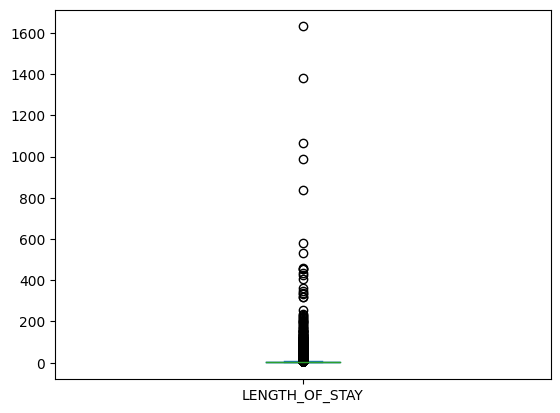

In [11]:
df["LENGTH_OF_STAY"].plot.box()

In [12]:
for col in cat_cols:
    display(df[col].value_counts())

2014Q4    9626
2013Q3    9549
2013Q4    9426
2013Q2    9407
2014Q3    9384
2013Q1    9295
2014Q2    9264
2014Q1    9207
2012Q4       1
Name: DISCHARGE, dtype: int64

1    18343
3    13667
1     9781
4     8884
2     8001
3     7159
4     4613
2     4170
5      201
9      145
5      110
9       85
Name: TYPE_OF_ADMISSION, dtype: int64

TX         74144
ZZ           301
NM           211
AR           189
FC           116
OK           106
LA            75
XX            13
INVALID        4
Name: PAT_STATE, dtype: int64

1          61779
6           4652
3           3094
62          1374
2            717
63           544
20           483
7            451
50           402
INVALID      385
51           343
4            328
65           191
5            138
64            87
61            65
30            46
43            23
9             22
8             16
66            11
41             7
40             1
Name: PAT_STATUS, dtype: int64

F    47091
M    28056
U       12
Name: SEX_CODE, dtype: int64

4          45750
5          16639
3           9654
2           1714
4            787
5            271
3            159
1            141
2             33
INVALID        8
1              3
Name: RACE, dtype: int64

1    13209
2    12992
3    12176
4    12078
5    10882
6     6928
7     6894
Name: ADMIT_WEEKDAY, dtype: int64

2          51980
1          22919
INVALID      260
Name: ETHNICITY, dtype: int64

1     37098
16     4452
15     4162
14     4080
10     3603
13     3518
17     3460
18     3063
12     2918
11     2814
19     2572
20     1994
21     1192
0        88
8        32
7        29
9        28
4        21
5        10
2         9
6         8
3         8
Name: PAT_AGE, dtype: int64

1    36445
2    23290
3    13241
4     2183
Name: ILLNESS_SEVERITY, dtype: int64

1    61388
3    13771
Name: RISK_MORTALITY, dtype: int64

In [13]:
df[cat_cols] = df[cat_cols].astype("object")
df[num_cols] = df[num_cols].astype("float")

In [14]:
df.dtypes

DISCHARGE                        object
TYPE_OF_ADMISSION                object
PAT_STATE                        object
PAT_STATUS                       object
SEX_CODE                         object
RACE                             object
ETHNICITY                        object
ADMIT_WEEKDAY                    object
PAT_AGE                          object
RISK_MORTALITY                   object
ILLNESS_SEVERITY                 object
LENGTH_OF_STAY                  float64
TOTAL_CHARGES                   float64
TOTAL_NON_COV_CHARGES           float64
TOTAL_CHARGES_ACCOMM            float64
TOTAL_NON_COV_CHARGES_ACCOMM    float64
TOTAL_CHARGES_ANCIL             float64
TOTAL_NON_COV_CHARGES_ANCIL     float64
dtype: object

In [15]:
for col in cat_cols:
    df[col] = df[col].apply(lambda x: str(x))

In [16]:
from sklearn.model_selection import train_test_split
y = "RISK_MORTALITY"
df_train, df_test = train_test_split(df, random_state=1000, test_size=0.2, stratify=df[y])
df_train.shape, df_test.shape

((60127, 18), (15032, 18))

<Axes: >

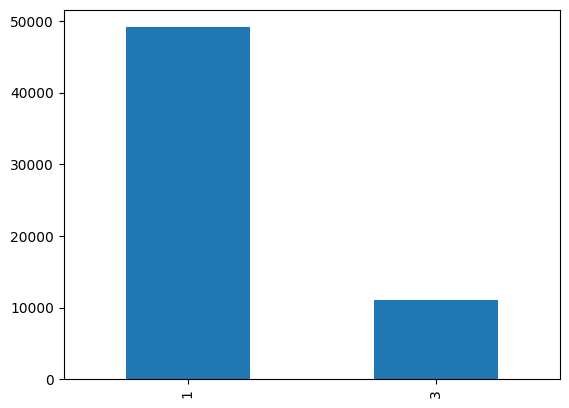

In [17]:
df_train[y].value_counts().plot.bar()

<Axes: >

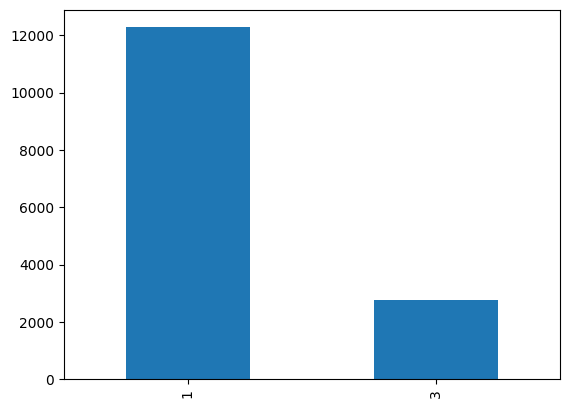

In [18]:
df_test[y].value_counts().plot.bar()

In [19]:
df_train.to_csv("train.csv", index=None)
df_test.to_csv("test.csv", index=None)

In [20]:
df_all = pd.concat([df_train, df_test])
df_all.to_csv("texas.csv", index=None)

In [21]:
df_demo = df_train.sample(100, random_state=1000)
df_demo.reset_index(inplace=True, drop=True)
df_demo.head()

,DISCHARGE,TYPE_OF_ADMISSION,PAT_STATE,PAT_STATUS,SEX_CODE,RACE,ETHNICITY,ADMIT_WEEKDAY,PAT_AGE,RISK_MORTALITY,ILLNESS_SEVERITY,LENGTH_OF_STAY,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL
0,2013Q2,3,TX,1,F,4,2,2,18,3,3,3.0,11394.88,0.0,2673.00,0.0,8721.88,0.0
1,2014Q4,3,TX,1,F,4,2,4,20,3,3,1.0,33948.20,0.0,3017.89,0.0,30930.31,0.0
2,2013Q3,2,TX,1,F,4,2,2,11,1,1,2.0,2400.00,0.0,2400.00,0.0,0.00,0.0
3,2013Q1,1,TX,6,M,4,1,7,15,1,3,5.0,67473.00,0.0,12342.00,0.0,55131.00,0.0
4,2013Q4,1,TX,1,F,4,2,7,13,3,3,6.0,31098.50,0.0,7418.00,0.0,23680.50,0.0


In [22]:
df_demo.to_csv("demo.csv", index=None)

In [23]:
ls

demo.csv                 texas-download.ipynb     texas.csv
test.csv                 texas-exploration.ipynb  train.csv


In [24]:
import sys
sys.path.append("../../../")
sys.path.append("../../")
from margctgan.metrics import utility

In [25]:
f1_score = utility.efficacy_test(realdata=df_test, fakedata=df_train, target_name="RISK_MORTALITY")
print(f1_score)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

0.8568189180434079


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
f1_score = utility.efficacy_test(realdata=df_train, fakedata=df_test, target_name="RISK_MORTALITY")
print(f1_score)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

0.8614256887534489


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
